**Electric Vehicle Analysis:**

This project focuses on analyzing the registration data of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) in Washington State, aiming to uncover trends, patterns, and adoption dynamics to gain insights into the growth and development of sustainable transportation.

**Problem Statement:**

Conduct a Data Analysis on Electric Vehicles using the provided dataset to uncover insights.

**Task 1:**
Perform Exploratory Data Analysis (EDA), including both Univariate and Bivariate analyses, to explore patterns and trends within the dataset.

**Task 2:**
Create a Choropleth map using Plotly Express to visualize the distribution of electric vehicles based on location.

**Task 3:**
Develop a Racing Bar Plot to animate the changes in the number of electric vehicle makes over the years.

In [23]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = '/content/dataset.csv'
ev_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
ev_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


**Data Cleaning**

In [ ]:
df.isna().sum().sort_values(ascending=False)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


df.isna().sum().sort_values(ascending=False)

,0
VIN (1-10),0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Utility,0
Vehicle Location,0
DOL Vehicle ID,0
Legislative District,0
Base MSRP,0
Electric Range,0
Electric Vehicle Type,0
County,0


In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

# Convert columns like 'Model Year' to numerical and 'Postal Code' to strings if necessary
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Postal Code'] = df['Postal Code'].astype(str)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112152 entries, 0 to 112151
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  object 
 5   Model Year                                         112152 non-null  int64  
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object

**Univariate Analysis and  Bivariate Analysis**

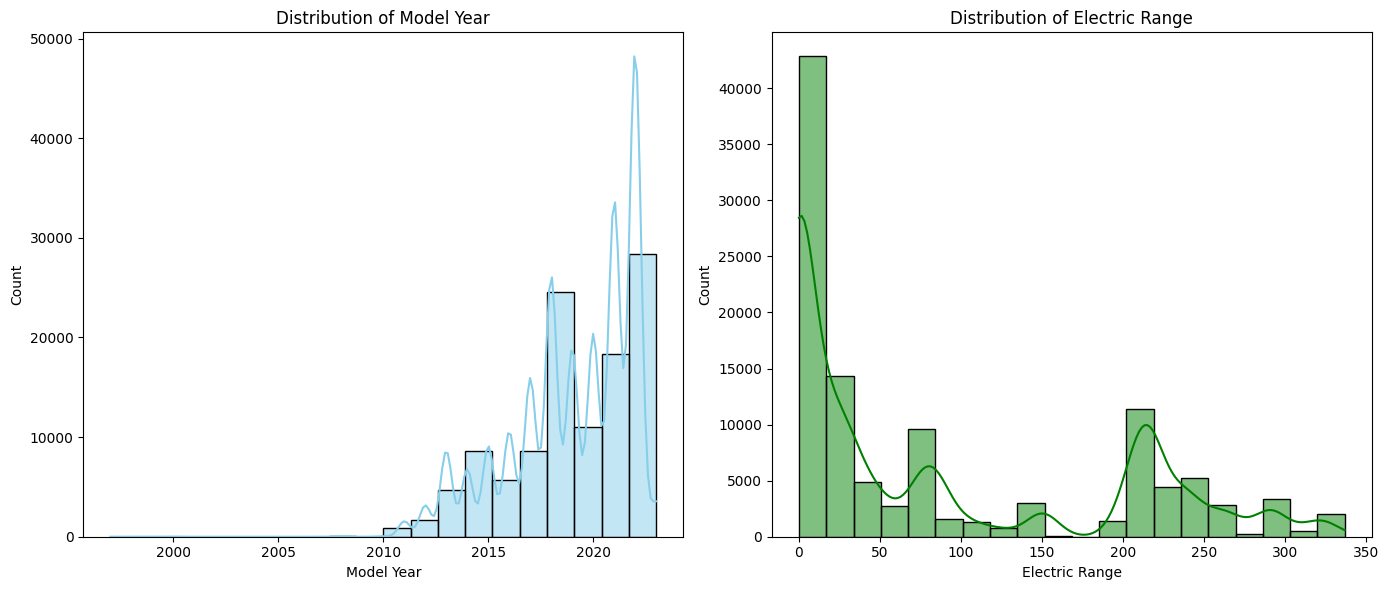

<ipython-input-27-9bcd706773b1>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




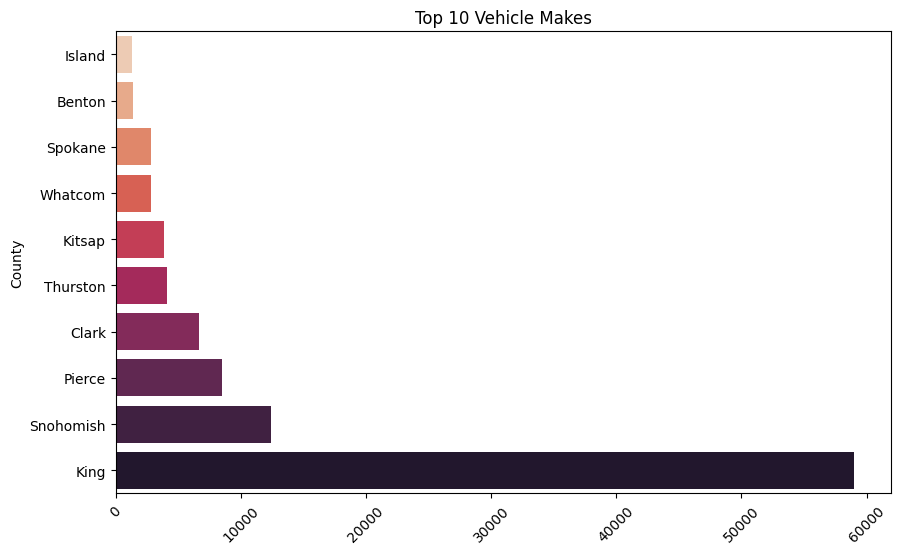

***** Top 10 Counties *****
King : 58980
Snohomish : 12412
Pierce : 8525
Clark : 6681
Thurston : 4109
Kitsap : 3828
Whatcom : 2839
Spokane : 2785
Benton : 1376
Island : 1298


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis of Numerical Columns: Plotting the distribution of 'Model Year' and 'Electric Range'
plt.figure(figsize=(14, 6))

# Model Year Distribution
plt.subplot(1, 2, 1)
sns.histplot(ev_data['Model Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Model Year')

# Electric Range Distribution
plt.subplot(1, 2, 2)
sns.histplot(ev_data['Electric Range'], bins=20, kde=True, color='green')
plt.title('Distribution of Electric Range')

plt.tight_layout()
plt.show()
# Which county has the highest population?
# Analyze unique counts for categorical columns
top_10_counties = df["County"].value_counts().sort_values(ascending=False).head(10)

top_10_counties_sorted = top_10_counties.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_10_counties_sorted.index, x=top_10_counties_sorted.values, palette='rocket_r')
plt.title('Top 10 Vehicle Makes')
plt.xticks(rotation=45)
plt.show()

print("*"*5, "Top 10 Countries", "*"*5)
for county, count in top_10_counties.items():
  print("{0} : {1}".format(county, count))

**Distribution of Model Year:**

The distribution is highly skewed to the right, with a large number of vehicles manufactured in recent years.
There are peaks around 2019 and 2020, suggesting a significant increase in EV production during those years.

**Distribution of Electric Range:**

The distribution is also skewed to the right, but to a lesser extent.
There is a peak around 200 miles, indicating that many EVs have a range of around 200 miles.
The distribution has a long tail, suggesting that some EVs have a much longer range.

**Distribution of Top 10 Countries**


King Country has the highest number of vehicles, by a significant margin.
Snohomish Country has the second-highest number of vehicles.
The remaining countries have significantly lower numbers of vehicles.
There is a clear trend of decreasing vehicle counts as you move down the list of countries.

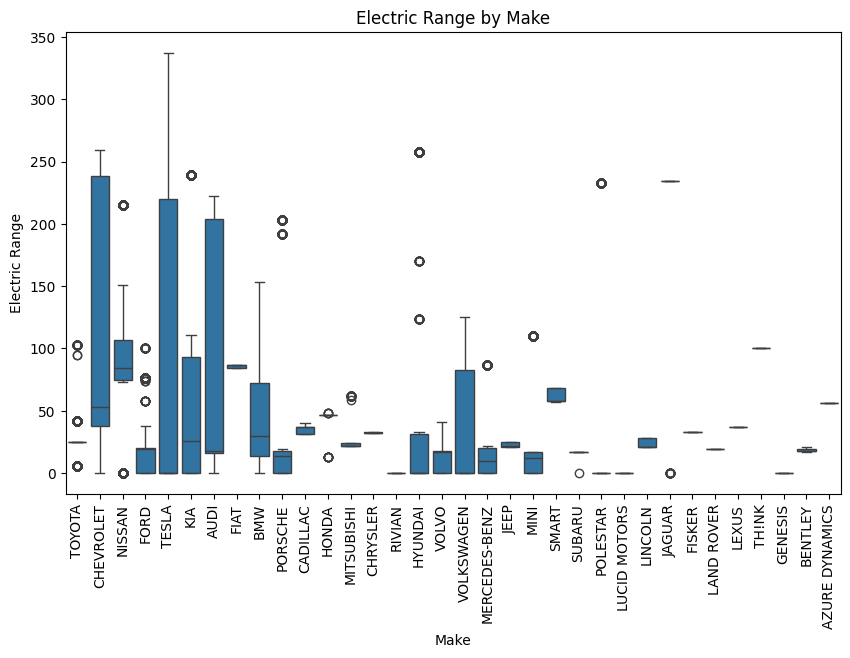

In [24]:

# Bivariate Analysis: Make vs Electric Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=ev_data, x='Make', y='Electric Range')
plt.xticks(rotation=90)
plt.title('Electric Range by Make')
plt.show()




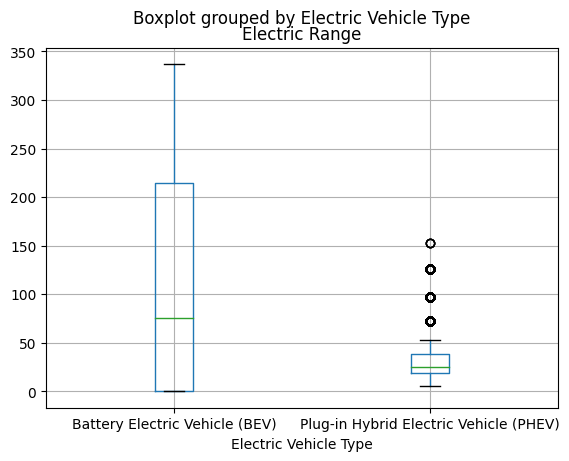

In [28]:


df.boxplot(column="Electric Range", by = "Electric Vehicle Type")#figsize = (8,6))
plt.show()


**Analysis of Electric Range by Electric Vehicle Type**

**Key Observations:**

Median Range: Battery Electric Vehicles (BEVs) generally have a higher median electric range compared to Plug-in Hybrid Electric Vehicles (PHEVs).

Range Variability: BEVs exhibit a wider range of electric ranges, with some having significantly higher values and others having lower values. PHEVs have a more concentrated range distribution, with most vehicles falling within a narrower range.

Outliers: There are a few outliers, particularly in the BEV category, indicating vehicles with exceptionally high electric ranges.

Overlapping Ranges: While the median range for BEVs is higher, there is some overlap in the ranges between the two types, suggesting that some PHEVs may have comparable or even higher ranges than certain BEVs.

In summary: The boxplot illustrates that BEVs generally have a higher median electric range than PHEVs, but there is significant variability within both categories. Some PHEVs may have comparable or even higher ranges than certain BEVs.










**Create a Choropleth using plotly.express to display the number of EV vehicles based on location.**

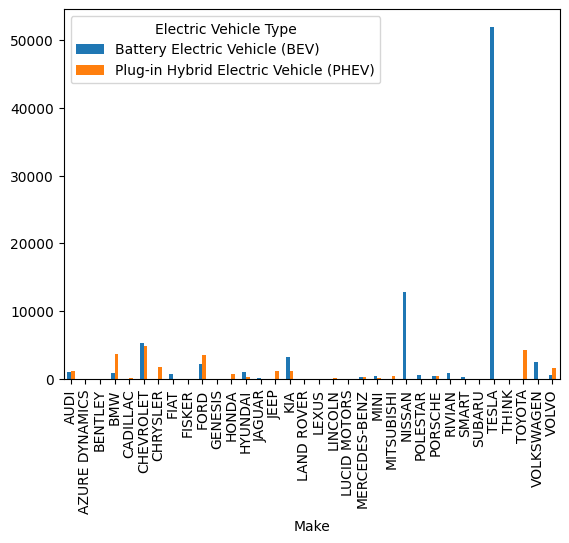

In [29]:

pd.crosstab(index=df["Make"],columns=df["Electric Vehicle Type"]).plot(kind = "bar")
plt.show()

**Analysis of Electric Vehicle Type by Make**

**Key Observations:**

Tesla Dominance: Tesla is the clear leader in both BEV and PHEV production, with significantly higher counts compared to other makes.

BEV Focus: Most makes primarily produce BEVs, with a limited number of PHEV offerings.

PHEV Concentration: A few makes, such as Chrysler, Ford, and Hyundai, have a higher concentration of PHEVs compared to BEVs.

Emerging Players: Some newer electric vehicle manufacturers, like Lucid Motors and Rivian, are focusing primarily on BEVs.

In summary: The stacked bar chart reveals a strong preference for BEVs among most electric vehicle manufacturers, with Tesla dominating the market. A few manufacturers have a more balanced approach, offering both BEVs and PHEVs.










In [ ]:
import plotly.express as px

# Grouping by State to get the count of EVs by location
ev_count_by_state = ev_data.groupby('State')['VIN (1-10)'].count().reset_index()
ev_count_by_state.columns = ['State', 'EV Count']

# Creating Choropleth map
fig = px.choropleth(ev_count_by_state,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='Number of Electric Vehicles by State')

fig.show()


**Analysis of Electric Vehicle Distribution by State**

**Key Observations:**

California Dominance: California has the highest concentration of electric vehicles, with a significantly darker color on the map, indicating a much higher EV count compared to other states.

Regional Clusters: There are noticeable regional clusters of higher EV adoption. States in the West, particularly California, Washington, and Oregon, have a higher density of electric vehicles.

Eastern Lag: Eastern states generally have lower EV counts, with darker shades concentrated in coastal areas like New York and Massachusetts.
Sparse Regions: The Midwest and South have relatively sparser EV populations, indicated by lighter shades on the map.

In summary: The map visually demonstrates a significant regional disparity in electric vehicle adoption across the United States, with California emerging as a clear leader. The concentration of EVs in certain regions, particularly the West Coast, highlights the influence of factors such as government policies, infrastructure, and consumer preferences on EV adoption.










In [ ]:
import pandas as pd
import plotly.express as px

# Load your EV dataset
df = pd.read_csv('/content/dataset.csv')


# Group data by State and Year (or any other time variable) and count EVs
ev_counts_by_state_year = df.groupby(['State', 'Model Year'])['VIN (1-10)'].count().reset_index()
ev_counts_by_state_year.rename(columns={'VIN (1-10)': 'Electric Vehicle Count'}, inplace=True)

# 3. Create the animated choropleth map
fig = px.choropleth(
    ev_counts_by_state_year,
    locations="State",  # Use the appropriate location column from your dataset
    locationmode="USA-states",  # Adjust if your locations are not US states
    color="Electric Vehicle Count",
    animation_frame="Model Year",  # The column to animate over
    color_continuous_scale="Viridis",  # Choose a color scale
    scope="usa",  # Adjust if your locations are not in the USA
    title="Electric Vehicle Count by State Over Time",
    hover_data=["Electric Vehicle Count"],  # Data to show on hover
)

fig.show()


**Create a Racing Bar Plot to display the animation of EV Make and its count each year.**

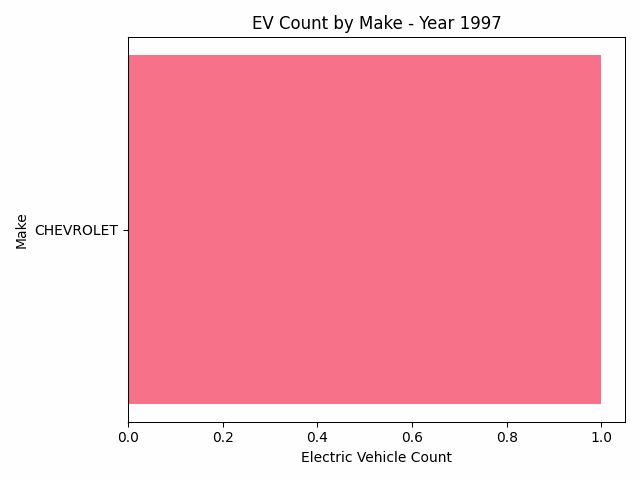

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns


# Group data by Make and Model Year, count EVs
ev_counts_by_make_year = ev_data.groupby(['Make', 'Model Year'])['VIN (1-10)'].count().reset_index()
ev_counts_by_make_year.rename(columns={'VIN (1-10)': 'Electric Vehicle Count'}, inplace=True)

# Create a color palette
color_palette = sns.color_palette("husl", len(ev_counts_by_make_year['Make'].unique()))

# Function to update the bar chart for each year
def update_bar_chart(year):
  plt.clf()  # Clear the current plot
  data_for_year = ev_counts_by_make_year[ev_counts_by_make_year['Model Year'] == year]

  # Sort bars by count for better visualization
  data_for_year = data_for_year.sort_values('Electric Vehicle Count', ascending=False)

  # Create the bar chart
  plt.barh(data_for_year['Make'], data_for_year['Electric Vehicle Count'], color=color_palette)
  plt.xlabel('Electric Vehicle Count')
  plt.ylabel('Make')
  plt.title(f'EV Count by Make - Year {year}')
  plt.tight_layout()

# Create the animation
fig = plt.figure()
years = sorted(ev_counts_by_make_year['Model Year'].unique())
ani = animation.FuncAnimation(fig, update_bar_chart, frames=years, interval=500)

# Save the animation as a GIF
ani.save('ev_racing_bar_chart.gif', writer='pillow')
plt.close()

# Display the GIF
from IPython.display import Image
Image(filename='ev_racing_bar_chart.gif')



**Analysis of EV Count by Make - Year 2023**
**Key Observations:**

Tesla Dominance: Tesla leads the market with a significantly higher count of electric vehicles compared to other makes.

Korean Presence: Korean brands like Hyundai, Kia, and Genesis have a notable presence in the EV market.

Traditional Automakers: Established automakers like Ford, BMW, and Volkswagen are also actively participating in the EV market.
Emerging Brands: Newer brands like Polestar and Lucid Motors are making a small but noticeable impact.

In summary: The bar chart reveals Tesla's strong dominance in the EV market for 2023. Korean brands are emerging as significant players, while traditional automakers are adapting to the electric vehicle transition. Newer brands are also making their mark in the market.










In [ ]:
! pip install bar_chart_race
import bar_chart_race as bcr
import pandas as pd

make_counts_per_year = ev_data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

pivot_df = make_counts_per_year.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Create the bar chart race with color effects
bcr.bar_chart_race(
    df=pivot_df,
    title='Year wise sales of each Makers from last decade',
    n_bars=10,                    # Top 10 bars to display
    period_length=1500,            # Speed of the race (1000 ms = 1 second per frame)
    fixed_order=False,             # Let the order of bars change as they race
    fixed_max=False,               # Allow the bar lengths to change dynamically
    steps_per_period=30,           # Smoother transitions between frames
    interpolate_period=False,      # No interpolation between frames for cleaner transitions
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},  # Customize the period label
    bar_label_size=7,              # Label size for the bars
    tick_label_size=8,             # Size for the tick labels
    figsize=(6, 4),                # Size of the chart
    dpi=144,                       # DPI for higher resolution
    # cmap='viridis'                 # You can also add colormap for gradient effect
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

